In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [79]:
raw = pd.read_csv("all2.csv")
raw.info()
data = raw.drop(raw.columns.values[0], axis=1)
data = data.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37613 entries, 0 to 37612
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            37613 non-null  int64  
 1   Price            36920 non-null  float64
 2   Description      37144 non-null  object 
 3   Kind             37613 non-null  object 
 4   Location         37613 non-null  object 
 5   Size             37587 non-null  float64
 6   Parking_slot     13476 non-null  float64
 7   Air_condition    16620 non-null  float64
 8   Heater_shower    13171 non-null  float64
 9   Furnish          12525 non-null  float64
 10  Inner_toilet     9295 non-null   float64
 11  Size_total_bool  5535 non-null   float64
 12  Source           37613 non-null  object 
 13  ward_id          37613 non-null  float64
 14  ward             37613 non-null  object 
 15  district         37613 non-null  object 
 16  province         37613 non-null  object 
 17  lat         

In [80]:
data.loc[data["Kind"] == "CCMN", "Parking_slot"] = 1
data.loc[data["Kind"] == "CCMN", "Air_condition"] = 1
data.loc[data["Kind"] == "CCMN", "Heater_shower"] = 1
data.loc[data["Kind"] == "CCMN", "Inner_toilet"] = 1

data.loc[data["Kind"] == "Homestay", "Parking_slot"] = 1
data.loc[data["Kind"] == "Homestay", "Air_condition"] = 1
data.loc[data["Kind"] == "Homestay", "Heater_shower"] = 1

In [81]:
data['Price'].describe()

count     37613.000000
mean        115.224880
std        5907.178218
min           0.000000
25%           2.500000
50%          10.000000
75%          33.000000
max      900000.000000
Name: Price, dtype: float64

In [82]:
data_categorical = data[['Kind', 'Source']]
data_float = data.select_dtypes(['float64'])
data_categorical_one_hot = pd.get_dummies(data_categorical)
data_processed = pd.concat([data_float, data_categorical_one_hot], axis=1)
data_processed = data_processed[data_processed['Source_alonhadat'] == 0]
data_processed1 = data_processed.drop(['lat', 'lng'], axis=1)
data_processed1

,Price,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool,ward_id,dist,...,area,density,Kind_CCMN,Kind_Chung cư,Kind_Homestay,Kind_Phòng trọ,Source_alonhadat,Source_chotot,Source_phongtro123,Source_thuephongtro
25720,4.5,35.0,1.0,1.0,1.0,1.0,1.0,0.0,121.0,5.995406,...,3.43,3023.89,1,0,0,0,0,0,1,0
25721,1.8,22.0,1.0,0.0,1.0,0.0,0.0,0.0,41454.0,2.975723,...,1.77,8571.83,0,0,0,1,0,0,1,0
25722,2.5,18.0,1.0,0.0,1.0,1.0,0.0,0.0,41434.0,5.036005,...,2.65,5301.55,0,0,0,1,0,0,1,0
25723,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,41254.0,4.526540,...,1.28,18509.99,0,0,0,1,0,0,1,0
25724,2.2,15.0,1.0,1.0,1.0,0.0,1.0,0.0,41254.0,4.526540,...,1.28,18509.99,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37608,2.0,14.0,0.0,0.0,1.0,1.0,1.0,0.0,41262.0,6.117014,...,0.29,36837.61,0,1,0,0,0,1,0,0
37609,2.9,20.0,0.0,0.0,1.0,1.0,1.0,0.0,41426.0,6.110135,...,4.98,1347.14,0,1,0,0,0,1,0,0
37610,2.3,18.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,7.491218,...,1.31,14895.50,0,0,0,1,0,1,0,0
37611,1.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,23024.0,7.212244,...,0.00,0.00,0,0,0,1,0,1,0,0


In [106]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

target= np.array(data_processed['Price'])
args = np.argwhere((target > 1) & (target < 15)).ravel()
features = data_processed1.drop(['Price', 'ward_id', 'area'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

target = target[args]
features = features[args]
print(target.shape, features.shape, args.shape)
print(target.mean())
kf = KFold(n_splits=5, random_state=42, shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):
    data_train = features[train_index]
    target_train = target[train_index]

    data_test = features[test_index]
    target_test = target[test_index]
    

    rf = RandomForestRegressor(n_estimators = 1000, random_state=42,
                                criterion='mse', bootstrap=True, n_jobs=12)
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(np.clip(predictions - target_test, a_min=0, a_max=None))
    
    print('Mean Absolute Error:', round(np.mean(errors), 2))
    mape = 100 * errors / target_test
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

(10425,) (10425, 20) (10425,)
2.4182075656594724
Mean Absolute Error: 0.28
Accuracy: 84.23 %.
Mean Absolute Error: 0.27
Accuracy: 84.47 %.
Mean Absolute Error: 0.26
Accuracy: 85.39 %.
Mean Absolute Error: 0.25
Accuracy: 86.0 %.
Mean Absolute Error: 0.24
Accuracy: 86.7 %.
Average accuracy: 85.35970855965505


In [104]:
y = rf.feature_importances_
print(y)

[0.45293288 0.02293356 0.01829631 0.02950447 0.03130511 0.02759411
 0.00384181 0.10690569 0.02203046 0.06430186 0.04926419 0.07927906
 0.0050984  0.00600676 0.01495567 0.00949966 0.         0.02187183
 0.0196769  0.01470128]


['Size' 'Parking_slot' 'Air_condition' 'Heater_shower' 'Furnish'
 'Inner_toilet' 'Size_total_bool' 'dist' 'num_hospital' 'num_building'
 'num_school' 'density' 'Kind_CCMN' 'Kind_Chung cư' 'Kind_Homestay'
 'Kind_Phòng trọ' 'Source_alonhadat' 'Source_chotot' 'Source_phongtro123'
 'Source_thuephongtro']


Text(0.5, 0, 'Mức độ')

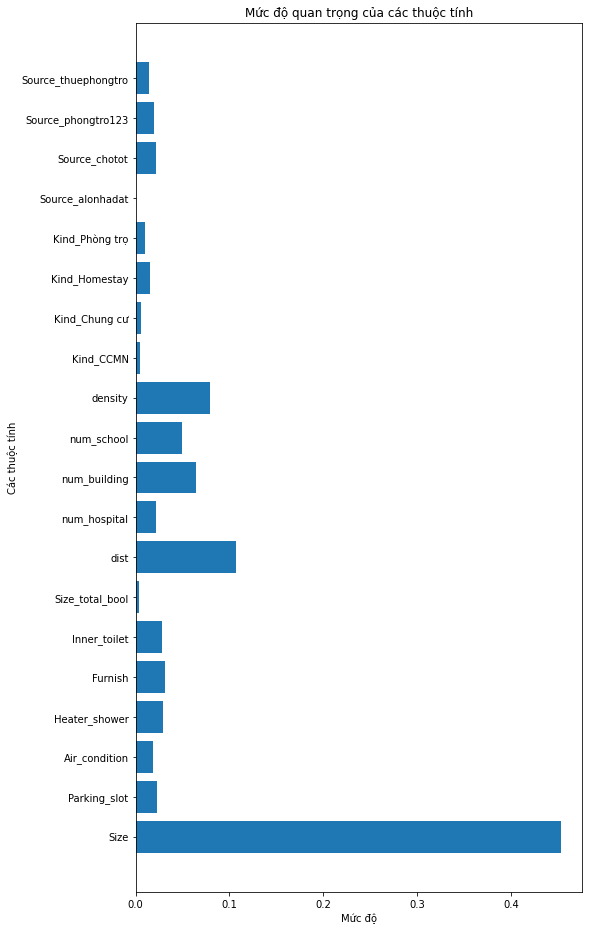

In [105]:
import matplotlib.pyplot as plt

features_name = data_processed.drop(['lat', 'lng', 'Price', 'ward_id', 'area'], axis = 1).columns.values
n = len(features_name)
print(features_name)
plt.figure(figsize=(8,16))
plt.barh(range(n), rf.feature_importances_)
plt.yticks(range(n), features_name)
plt.title("Mức độ quan trọng của các thuộc tính")
plt.ylabel("Các thuộc tính")
plt.xlabel("Mức độ")

In [86]:
# corr = data_processed.corr()
# plt.figure(figsize=(30,30))
# sns.heatmap(corr, annot=True, cmap="Blues")

In [35]:
X, Y = features, target

In [36]:
X.shape, Y.shape

((10412, 16), (10412,))

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [39]:
import tensorflow as tf
from tf import keras

ModuleNotFoundError: No module named 'tf'

In [54]:
df1 = pd.read_excel('ward_density.xlsx')
df1

,ward,district,area,density,raw_name,ward_string
0,bắc từ liêm,bắc từ liêm,43.56,5118.50,Bắc Từ Liêm,bắc từ liêm bắc từ liêm hà nội
1,cổ nhuế,bắc từ liêm,6.40,9153.93,Cổ Nhuế,cổ nhuế bắc từ liêm hà nội
2,đông ngạc,bắc từ liêm,3.64,8667.14,Đông Ngạc,đông ngạc bắc từ liêm hà nội
3,liên mạc,bắc từ liêm,6.24,1316.62,"Liên Mạc, Bắc Từ Liêm",liên mạc bắc từ liêm hà nội
4,minh khai,bắc từ liêm,4.96,5180.17,"Minh Khai, Bắc Từ Liêm",minh khai bắc từ liêm hà nội
...,...,...,...,...,...,...
604,trường thịnh,ứng hòa,5.70,1089.17,"Trường Thịnh, Ứng Hòa",trường thịnh ứng hòa hà nội
605,vân đình,ứng hòa,5.67,2263.03,Vân Đình,vân đình ứng hòa hà nội
606,vạn thái,ứng hòa,6.06,1458.09,"Vạn Thái, Ứng Hòa",vạn thái ứng hòa hà nội
607,viên an,ứng hòa,4.71,1285.87,"Viên An, Ứng Hòa",viên an ứng hòa hà nội


In [55]:
df2 = pd.read_excel('ward_hanoi_processed.xlsx')
df2

,ward_id,ward,address_type,district_id,district,province_id,province,lat,lng,modified,ward_string,ngram_string,area,density
0,31,cống vị,1,2,ba đình,1,hà nội,21.035935,105.80994989999999,2020-11-03 14:26:34,cống vị ba đình hà nội,ba ba_đình ba_đình_hà cống cống_vị cống_vị_ba ...,0.52,30278.63
1,32,điện biên,1,2,ba đình,1,hà nội,21.0331477,105.83930439999995,2020-11-03 14:26:34,điện biên ba đình hà nội,ba ba_đình ba_đình_hà biên biên_ba biên_ba_đìn...,0.90,10957.95
2,33,đội cấn,1,2,ba đình,1,hà nội,21.0353818,105.81927569999993,2020-11-03 14:26:34,đội cấn ba đình hà nội,ba ba_đình ba_đình_hà cấn cấn_ba cấn_ba_đình h...,0.41,38683.38
3,34,giảng võ,1,2,ba đình,1,hà nội,21.0270609,105.8194896,2020-07-10 12:31:07,giảng võ ba đình hà nội,ba ba_đình ba_đình_hà giảng giảng_võ giảng_võ_...,0.64,27900.61
4,35,kim mã,1,2,ba đình,1,hà nội,21.0316443,105.82462659999999,2020-11-03 14:26:34,kim mã ba đình hà nội,ba ba_đình ba_đình_hà hà hà_nội kim kim_mã kim...,0.50,30655.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,41462,quỳnh mai,1,8,hai bà trưng,1,hà nội,21.0090571,105.86075069999993,2020-07-08 14:53:21,quỳnh mai hai bà trưng hà nội,bà bà_trưng bà_trưng_hà hai hai_bà hai_bà_trưn...,0.15,81229.39
581,41466,quỳnh lôi,1,8,hai bà trưng,1,hà nội,21.0090571,105.86075069999993,2020-07-08 14:53:47,quỳnh lôi hai bà trưng hà nội,bà bà_trưng bà_trưng_hà hai hai_bà hai_bà_trưn...,0.25,63708.93
582,41470,minh khai,1,8,hai bà trưng,1,hà nội,21.0090571,105.86075069999993,2020-07-08 14:53:57,minh khai hai bà trưng hà nội,bà bà_trưng bà_trưng_hà hai hai_bà hai_bà_trưn...,0.51,34924.64
583,49780,trương định,1,9,hoàng mai,1,hà nội,20.9937815,105.84668750000003,2020-07-08 14:57:32,trương định hoàng mai hà nội,hoàng hoàng_mai hoàng_mai_hà hà hà_nội mai mai...,NaN,NaN


In [57]:
df_target = df2[df2['area'].isnull()]

In [64]:
len(df_target['ward'].str.lower())

35

In [63]:
df1['ward'].str.lower()

0       bắc từ liêm
1           cổ nhuế
2         đông ngạc
3          liên mạc
4         minh khai
           ...     
604    trường thịnh
605        vân đình
606        vạn thái
607         viên an
608        viên nội
Name: ward, Length: 609, dtype: object